In [388]:
import pandas as pd
pd.options.display.max_rows = 6
%matplotlib inline
import numpy
import pylab

Question 1

In [387]:
crimes = pd.read_csv('crimes2015.csv', parse_dates=['Date'])

In [13]:
se=pd.read_csv('se.csv')

(a) Calculate the number of crimes in each Community Area in 2015.

In [41]:
crimes = crimes[crimes['Community Area'] != 0] #Drop the 2 entries with 0 value as Community Area, presumbly by mistake 
crimes_by_community = crimes.groupby('Community Area')
community_crime_count = crimes_by_community['ID'].agg('count')
community_crime_count

Community Area
1     3526
2     3063
3     3592
      ... 
75    2055
76    1623
77    2213
Name: ID, dtype: int64

(b) Sort the Community Areas by 2015 crime count. Which Community Area (by name) has the highest crime count. The lowest?

In [198]:
community_crime_count.sort_values(ascending=False)

Community Area
25    17055
8      8946
43     8936
      ...  
12      445
47      380
9       254
Name: ID, dtype: int64

In [43]:
community_crime_max=se[se['Community Area Number']==25]['COMMUNITY AREA NAME']
community_crime_max

24    Austin
Name: COMMUNITY AREA NAME, dtype: object

In [44]:
community_crime_min=se[se['Community Area Number']==9]['COMMUNITY AREA NAME']
community_crime_min

8    Edison Park
Name: COMMUNITY AREA NAME, dtype: object

(c) Create a table whose rows are days in the year and columns are the 77 Community Area crime counts. Select a few Communities that you are interested and plot time series.

In [45]:
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)
crimes['Day'] = crimes['Date'].apply(to_day)
crimes_by_community_day = crimes.groupby(['Community Area', 'Day'])
crimes_by_community_day_count = crimes_by_community_day['ID'].agg('count')
crimes_by_community_day_count

Community Area  Day       
1               2015-01-01    13
                2015-01-02     5
                2015-01-03     7
                              ..
77              2015-12-29     4
                2015-12-30     5
                2015-12-31     4
Name: ID, dtype: int64

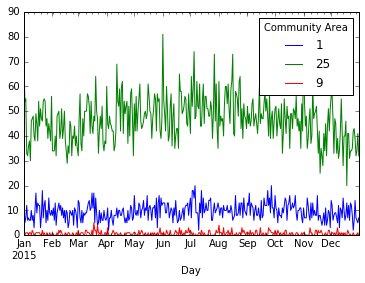

In [52]:
community_day_timeseries = crimes_by_community_day_count.unstack('Community Area')
community_day_timeseries.fillna(0, inplace=True)
community_day_timeseries[[1,25,9]].plot()

(d) By joining with the socioeconomic data, create a scatter plot of crime counts against per capita income. Summarize the relationship in words.

In [57]:
community_area_crime = pd.DataFrame({'Crime Count': community_crime_count})
se_crime = se.merge(community_area_crime, left_on='Community Area Number', right_index=True)
se_crime

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Crime Count
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,3526
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,3063
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,3592
...,...,...,...,...,...,...,...,...,...,...
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,2055
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,1623
76,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19,2213


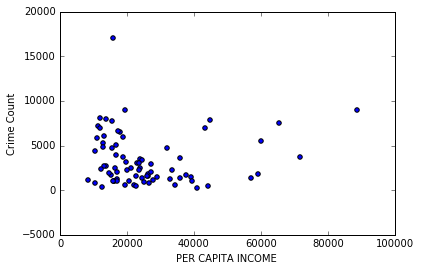

In [75]:
se_crime.plot(kind='scatter', x='PER CAPITA INCOME ', y='Crime Count')

In [80]:
#There isn't a clear relationship between total crime counts and per capita income.

Question 2

In [164]:
population=pd.read_csv('population.csv') 
tracts=pd.read_csv('tracts.csv')

(a) Join these together using the fact that the last six digits of the tract id in the mapping data correspond to the first six digits of the block id. However, the data portal has a bug: if the block starts with a zero, that digit is missing!

In [165]:
population['CENSUS BLOCK']=population['CENSUS BLOCK']/10000
population.astype(int)

,CENSUS BLOCK,TOTAL POPULATION
0,31000,104
1,31000,46
2,31000,40
...,...,...
46288,841900,131
46289,841900,79
46290,841900,20


In [168]:
tracts['tract_id']=tracts['tract_id']-17031000000
tracts

,tract_id,community_id
0,842400,44
1,840300,59
2,841100,34
...,...,...
798,130300,13
799,292200,29
800,630900,63


In [169]:
population_tract = population.astype(int).merge(tracts, left_on='CENSUS BLOCK', right_on='tract_id')
population_tract

,CENSUS BLOCK,TOTAL POPULATION,tract_id,community_id
0,31000,104,31000,3
1,31000,46,31000,3
2,31000,40,31000,3
...,...,...,...,...
46258,841800,24,841800,69
46259,841800,4,841800,69
46260,841800,29,841800,69


(b) Calculate the total population in each Community Area.

In [193]:
population_by_community = population_tract.groupby(' community_id')
population_community_count = population_by_community['TOTAL POPULATION'].agg('sum')
population_community_count

 community_id
1     54991
2     71942
3     56362
      ...  
75    22544
76    12756
77    56521
Name: TOTAL POPULATION, dtype: int32

Question 3

Using your answer to (2), calculate the crime rate (defined as crime count per thousand capita) for the city in 2015. Then reanswer (1a-d) with crime count replaced by crime rate. Summarize your findings in words.

In [205]:
#a
crime_rate=community_crime_count/population_community_count
crime_rate

Community Area
1     0.064120
2     0.042576
3     0.063731
        ...   
75    0.091155
76    0.127234
77    0.039154
dtype: float64

In [203]:
#b
crime_rate.sort_values(ascending=False)

Community Area
26    0.322593
37    0.290682
27    0.256722
        ...   
74    0.031897
12    0.024044
9     0.022705
dtype: float64

In [206]:
crime_rate_max=se[se['Community Area Number']==26]['COMMUNITY AREA NAME']
crime_rate_max

25    West Garfield Park
Name: COMMUNITY AREA NAME, dtype: object

In [261]:
crime_rate_min=se[se['Community Area Number']==9]['COMMUNITY AREA NAME']
crime_rate_min

8    Edison Park
Name: COMMUNITY AREA NAME, dtype: object

In [256]:
#c
population_community_countpd = pd.DataFrame({'Population': population_community_count})
crimesrate=crimes.merge(population_community_countpd, left_on='Community Area', right_index=True)

In [255]:
crimesrate_by_community_day = crimesrate.groupby(['Community Area', 'Day'])
population_by_community_day_count = crimesrate_by_community_day['Population'].agg('mean')
population_by_community_day_count

Community Area  Day       
1               2015-01-01    54991
                2015-01-02    54991
                2015-01-03    54991
                              ...  
77              2015-12-29    56521
                2015-12-30    56521
                2015-12-31    56521
Name: Population, dtype: int32

In [246]:
crimes_by_community_day_count

Community Area  Day       
1               2015-01-01    13
                2015-01-02     5
                2015-01-03     7
                              ..
77              2015-12-29     4
                2015-12-30     5
                2015-12-31     4
Name: ID, dtype: int64

In [254]:
crimesrate_final=crimes_by_community_day_count/population_by_community_day_count
crimesrate_final

Community Area  Day       
1               2015-01-01    0.000236
                2015-01-02    0.000091
                2015-01-03    0.000127
                                ...   
77              2015-12-29    0.000071
                2015-12-30    0.000088
                2015-12-31    0.000071
dtype: float64

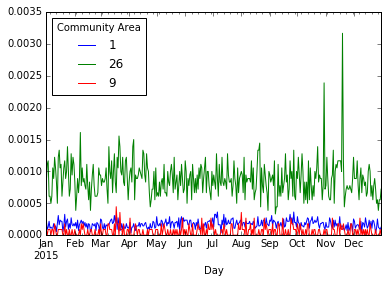

In [258]:
community_day_timeseries_new = crimesrate_final.unstack('Community Area')
community_day_timeseries_new.fillna(0, inplace=True)
community_day_timeseries_new[[1,26,9]].plot()

In [259]:
#d
community_area_crime_new = pd.DataFrame({'Crime Rate': crime_rate})
se_crime = se.merge(community_area_crime_new, left_on='Community Area Number', right_index=True)
se_crime

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Crime Rate
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,0.064120
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,0.042576
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,0.063731
...,...,...,...,...,...,...,...,...,...,...
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,0.091155
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,0.127234
76,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19,0.039154


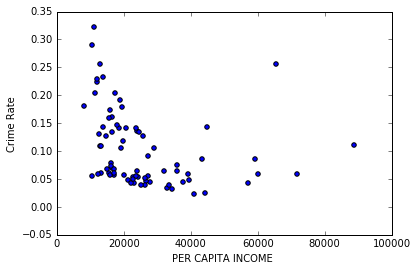

In [260]:
se_crime.plot(kind='scatter', x='PER CAPITA INCOME ', y='Crime Rate')

In [ ]:
#Comments: by using the concept "crime rate" instead of "crime counts", we take into the fact that different community
#areas have different population. And this help us to better understand the security of an area. For instance, Austin
#has the biggest number of total crimes, but in terms of crime rate West Garfield ranks first. Meanwhile we can observe
#that there is a negative correlation between the Crime Rate and Per Capita Income, which is not present previously. And
#this again suggests the importance of good measurement.

Question 4

In [389]:
police = pd.read_csv('police.csv')

(a) Extract the latitudes and longitudes of the police stations (found in the LOCATION column) as floats into their own columns called 'Station Latitude' and 'Station Longitude', respectively.

In [390]:
import re
#keep four digits
police['Station Latitude'] = police['LOCATION'].str.extract('(\d\d\.\d\d\d\d)')
police['Station Longitude'] = police['LOCATION'].str.extract('(-\d\d\.\d\d\d\d)')
police

,DISTRICT,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,LOCATION,Station Latitude,Station Longitude
0,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,https://portal.chicagopolice.org/portal/page/p...,NaN,NaN,NaN,"3510 S Michigan Ave Chicago, IL 60653 (41.8308...",41.8308,-87.6233
1,1,1718 S State St,Chicago,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.8588,-87.6273
2,2,5101 S Wentworth Ave,Chicago,IL,60609,https://portal.chicagopolice.org/portal/page/p...,312-747-8366,312-747-5396,312-747-6656,"5101 Wentworth Ave\nChicago, IL 60609\n(41.801...",41.8017,-87.6306
...,...,...,...,...,...,...,...,...,...,...,...,...
20,22,1900 W Monterey Ave,Chicago,IL,60643,https://portal.chicagopolice.org/portal/page/p...,312-745-0710,312-745-0814,312-745-0569,"1900 Monterey Ave\nChicago, IL 60643\n(41.6913...",41.6913,-87.6685
21,24,6464 N Clark St,Chicago,IL,60626,https://portal.chicagopolice.org/portal/page/p...,312-744-5907,312-744-6928,312-744-7603,"6464 Clark St\nChicago, IL 60626\n(41.99944797...",41.9994,-87.6711
22,25,5555 W Grand Ave,Chicago,IL,60639,https://portal.chicagopolice.org/portal/page/p...,312-746-8605,312-746-4353,312-746-8383,"5555 Grand Ave\nChicago, IL 60639\n(41.9184858...",41.9184,-87.7646


(b) Join the crime data with the stations on police district. Hint: the station district is a text field (because one of them is 'Headquarters') so you'll need to convert the crime district to the same.

In [391]:
crimes['Community Area'] = crimes['Community Area'].replace(35,'Headquarters')

In [392]:
crimes['Community Area']=crimes['Community Area'].astype(str)

In [393]:
police['DISTRICT']=police['DISTRICT'].astype(str)

In [444]:
crimepolice=crimes.merge(police, left_on='Community Area', right_on='DISTRICT')

In [435]:
crimepolice

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,LOCATION,Station Latitude,Station Longitude
0,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,Chicago,IL,60609,https://portal.chicagopolice.org/portal/page/p...,312-747-8366,312-747-5396,312-747-6656,"5101 Wentworth Ave\nChicago, IL 60609\n(41.801...",41.8017,-87.6306
1,10364975,HZ100442,2015-12-31 20:30:00,066XX N TALMAN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,True,False,...,Chicago,IL,60609,https://portal.chicagopolice.org/portal/page/p...,312-747-8366,312-747-5396,312-747-6656,"5101 Wentworth Ave\nChicago, IL 60609\n(41.801...",41.8017,-87.6306
2,10364431,HY556315,2015-12-31 14:02:00,024XX W DEVON AVE,0313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,ALLEY,True,False,...,Chicago,IL,60609,https://portal.chicagopolice.org/portal/page/p...,312-747-8366,312-747-5396,312-747-6656,"5101 Wentworth Ave\nChicago, IL 60609\n(41.801...",41.8017,-87.6306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83440,9914648,HY103906,2015-01-04 15:15:00,076XX W IBSEN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,Chicago,IL,60608,https://portal.chicagopolice.org/portal/page/p...,312-747-8227,312-747-5329,312-747-9172,"3120 Halsted St\nChicago, IL 60608\n(41.837503...",41.8375,-87.6466
83441,9914737,HY103235,2015-01-03 20:20:00,065XX N OKETO AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,Chicago,IL,60608,https://portal.chicagopolice.org/portal/page/p...,312-747-8227,312-747-5329,312-747-9172,"3120 Halsted St\nChicago, IL 60608\n(41.837503...",41.8375,-87.6466
83442,10048710,HY238002,2015-01-01 10:00:00,074XX N ORIOLE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,Chicago,IL,60608,https://portal.chicagopolice.org/portal/page/p...,312-747-8227,312-747-5329,312-747-9172,"3120 Halsted St\nChicago, IL 60608\n(41.837503...",41.8375,-87.6466


(c) Define a function which calculates the distance in kilometers between two points (latitude, longitude) using the Pythagorean theorem

In [445]:
crimepolice['Station Latitude']=crimepolice['Station Latitude'].astype(float)
crimepolice['Station Longitude']=crimepolice['Station Longitude'].astype(float)
crimepolice['Longitude']=crimepolice['Longitude'].astype(float)
crimepolice['Latitude']=crimepolice['Latitude'].astype(float)
crimepolice.insert(1,'Distance',1)
def distance(n):
     for i in range(0,n):
        crime_lat_i = crimepolice.iloc[i]['Latitude']
        crime_lon_i = crimepolice.iloc[i]['Longitude']
        station_lat_i = crimepolice.iloc[i]['Station Latitude']
        station_lon_i = crimepolice.iloc[i]['Station Longitude']
        d_i=(((crime_lat_i-station_lat_i)**2+(crime_lon_i-station_lon_i)**2)**0.5)*95
        crimepolice.iloc[i, crimepolice.columns.get_loc('Distance')] = d_i       

(d) Calculate the distance between each crime and its district police station. Hint: If your answer to (c) is of the form 

In [448]:
distance(83442)

(e) Plot a histogram of crime distances to district police stations. Summarize the relationship in words.

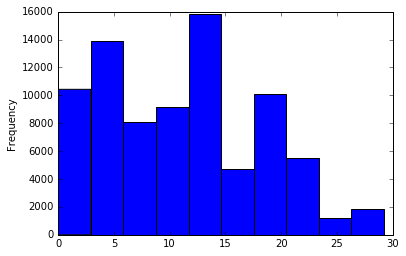

In [453]:
crimepolice['Distance'].plot(kind='hist')